In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
energy = pd.read_csv("energy.csv")
energy.head(3)

,timestamp,load,temp
0,2012-01-01 00:00:00,2698.0,32.000000
1,2012-01-01 01:00:00,2558.0,32.666667
2,2012-01-01 02:00:00,2444.0,30.000000


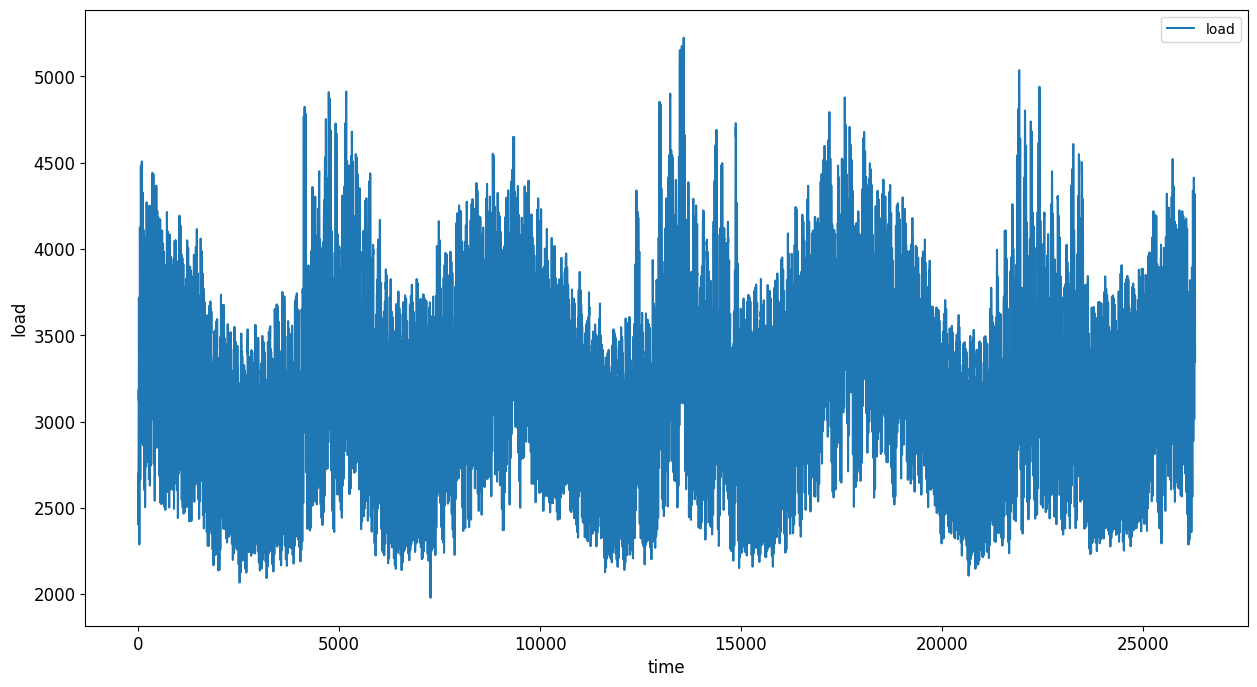

In [4]:
energy.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('time', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()

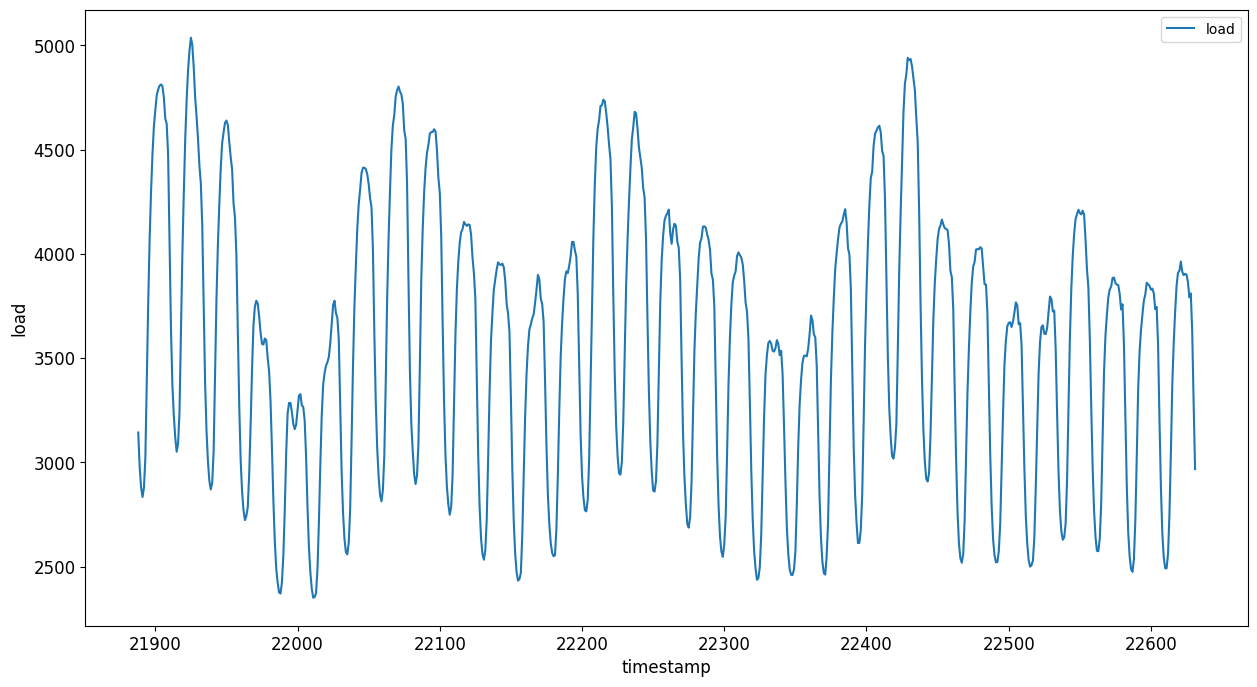

In [13]:
energy["timestamp"] =pd.to_datetime(energy["timestamp"])
july = energy[(energy['timestamp'].dt.month == 7) & (energy['timestamp'].dt.year == 2014 )]
july.plot(y='load', subplots=True, figsize=(15, 8), fontsize=12)
plt.xlabel('timestamp', fontsize=12)
plt.ylabel('load', fontsize=12)
plt.show()